In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

#import rir_delay functions you wrote
import rir_delay

# Task: Shift an IR with relative delay

Ok, we've written some useful functions for 3D coordinates, now let's put this all together and start making spatial IRs! The goal of this notebook will be to prototype and implement a function that takes a single-channel RIR, and transforms it to a multichannel "spatial" RIR! We'll use the `cartesian_disance()` function and `spherical_distance()` functions you wrote and implemented in the past.

First, let's load in and examine the mono IR just to makse sure everything is working properly.

In [2]:
#load in a sample mono-channel IR, and it's sample rate
ir, sr = lr.load("mono_ir.wav")

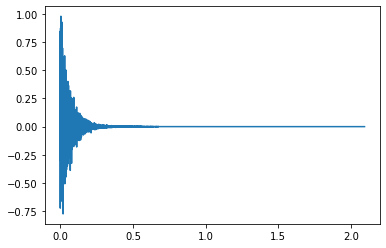

In [8]:
#plot and listen to our IR

#for an accurate time-axis, we take the total
#number of samples, and divide it by the sample rate

#remember, the samle rate is simply the number of samples
#recorded per-second

t = np.arange(len(ir))/sr #time labels of each sample (in seconds)
plt.plot(t, ir) #plot sample
Audio(data=ir, rate=sr) #playback audio

Ok great! Now here comes the tough part; let's turn this into a spatial RIR! Let's assume we're given the following information:

* The location of our $N$-microphone array. Let's start with the simple tetrahedral case where $N$=4.
* The location of our source, relative to the center of our microphone array.
* A mono-channel IR (loaded above).

From here, the following steps should solve the problem:

1. Compute the distances between our source, and our four microphones.
2. Convert the distances (in meters) to delays (in samples).
3. Apply the delays to the mono-channel IR (you might need to zero-pad the signal)
4. Concatenate the $N$ delayed IRs into one $N$-channel signal

Easy enough, hopefully! One thing that might help you out is writing a function, that takes in a sound signal, and shifts it by a certain number of samples.

I'll write some function outlines for you to get you started, but feel free to ignore these if you don't think they're useful.

In [9]:
#coordinates for microphones
#coordinates stored in radius (m), azimuth (deg) and elevation (deg)
m1_coords = [0.042, 45, 35]
m2_coords = [0.042, -45, -35]
m3_coords = [0.042, 135, -35]
m4_coords = [0.042, -135, 35]

mic_coords = [m1_coords, m2_coords, m3_coords, m4_coords]

In [10]:
#you can access the functions in 'rir_delay.py' by the following syntax:
delay_sec = rir_delay.spherical_distance(m1_coords, m2_coords)

In [11]:
delay_samp = int(delay_sec * sr)
delayed_ir = rir_delay.shift_ir(ir, delay_samp*10)

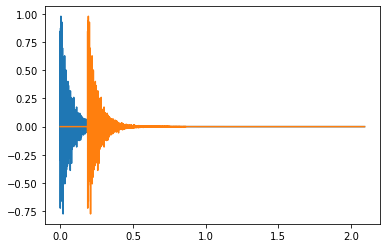

In [12]:
plt.plot(t, ir) #plot sample

plt.plot(t, delayed_ir)
Audio(data=ir+delayed_ir, rate=sr) #playback audio

## ToDo:

Write a function that takes the variable `mic_coords` (a list of the spherical coordinates of the microphones) and a new point, and computes the shifted RIR for each of those points. See below for desired structure:

In [ ]:
def shift_ir(ir, location, mic_coords):
    '''
    takes an IR and delays it based on the location
    given by variable "location", using the N x 3 list "mic_coords"
    '''    
    
    
    return rir_shifted # N x T+pad array, where N is the number of mics (4)
                       # and T is the length of the RIR, plus any padding needed
                       # to deal with the shifting